In [40]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [41]:
dataset = load_wine()

In [42]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [43]:
data = dataset.data
target = dataset.target

In [44]:
data.shape

(178, 13)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [46]:
mlp1 = KNeighborsClassifier()
mlp1.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
Y_pred = mlp1.predict(X_test)


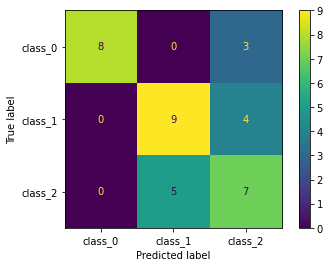

In [48]:
classes = dataset.target_names
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [49]:
print("Classification report before LDA")
print("================================")
print(classification_report(Y_test, Y_pred))

Classification report before LDA
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.64      0.69      0.67        13
           2       0.50      0.58      0.54        12

    accuracy                           0.67        36
   macro avg       0.71      0.67      0.68        36
weighted avg       0.70      0.67      0.68        36



In [50]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(data, target)

In [51]:
X_lda.shape

(178, 2)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, target, test_size=0.2)

In [53]:
mlp2 = KNeighborsClassifier()
mlp2.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
Y_pred = mlp2.predict(X_test)

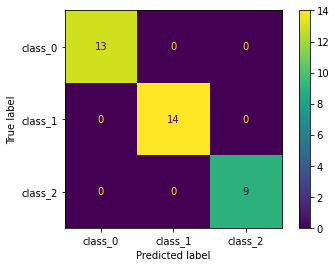

In [55]:
classes = dataset.target_names
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [56]:
print("Classification report after LDA")
print("================================")
print(classification_report(Y_test, Y_pred))

Classification report after LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

